In [22]:
from typing import List, Tuple, Union
import PIL.Image as Image
import PIL.ImageDraw as ImageDraw

def create_zebra_image_with_vertical_splitting(
    images: List[Image.Image],
    output_size: Tuple[int, int], #ширина и высота
    sequence: str, #порядок частей
    num_stripes: int, #колво полос
    show_grid: bool, #сетка
    grid_color: Union[str, Tuple[int, int, int], Tuple[int, int, int, int]], #цвет сетки
    orientation: str
):
    # Проверка, соответствует ли количество изображений последовательности
    if len(images) != len(set(sequence)):
        raise ValueError("Количество уникальных изображений в списке не соответствует последовательности.")

    # Проверка ориентации
    if orientation not in ["horizontal", "vertical"]:
        raise ValueError("Неверная ориентация. Выберите либо 'horizontal' (горизонтально), либо 'vertical' (вертикально).")

    # Расчет размера каждой полосы
    stripe_width = output_size[0] // num_stripes
    stripe_height = output_size[1] // num_stripes

    # Создание нового пустого изображения
    zebra_image = Image.new("RGB", output_size)

    # Подготовка к рисованию сетки
    draw = ImageDraw.Draw(zebra_image)

    # Итерация по полосам
    for i in range(num_stripes):
        # Определение изображения для использования в этой полосе на основе последовательности
        image_index = int(sequence[i % len(sequence)]) - 1
        image_to_use = images[image_index]

        # Резка изображения на части
        cropped_image = image_to_use.crop((
            (i * stripe_width),
            0,
            ((i + 1) * stripe_width),
            image_to_use.height
        ))

        # Вставка измененного изображения в изображение зебры
        zebra_image.paste(cropped_image, (i * stripe_width, 0))

        # Если сетка должна быть показана, рисуем линии
        if show_grid:
            draw.line([(i * stripe_width, 0), (i * stripe_width, output_size[1])], fill=grid_color)

    return zebra_image

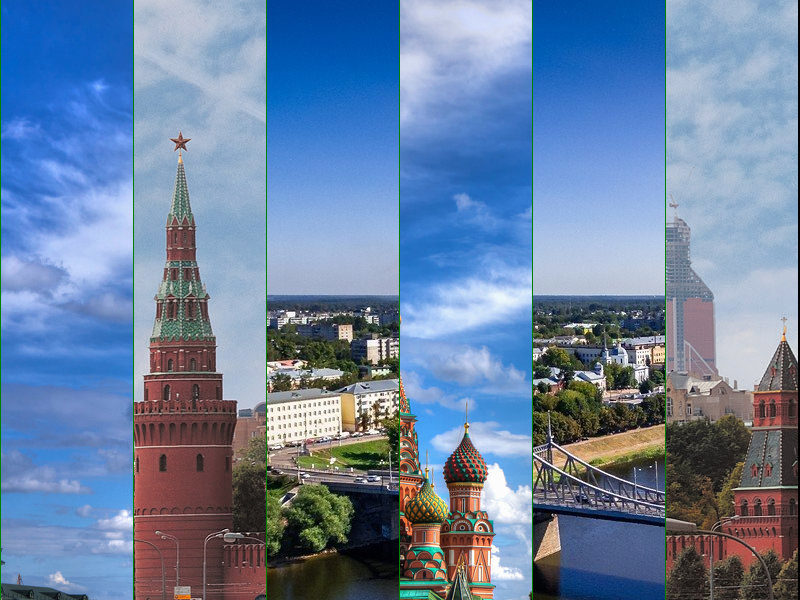

In [24]:
import PIL.Image as Image

# Load the images
image1 = Image.open(r"1.jpg")
image2 = Image.open(r"3.jpg")
image3 = Image.open(r"4.jpg")

# Create a list of images
images = [image1, image2, image3]

# Set the output size
output_size = (800, 600)

# Set the sequence
sequence = "123132"

# Set the number of stripes
num_stripes = 6

# Set the flag to show the grid
show_grid = True

# Set the grid color
grid_color = "green"

# Set the orientation
orientation = "horizontal"

# Call the function
zebra_image = create_zebra_image_with_vertical_splitting(
    images=images,
    output_size=output_size,
    sequence=sequence,
    num_stripes=num_stripes,
    show_grid=show_grid,
    grid_color=grid_color,
    orientation=orientation
)


# Display the zebra image (optional)
display(zebra_image)

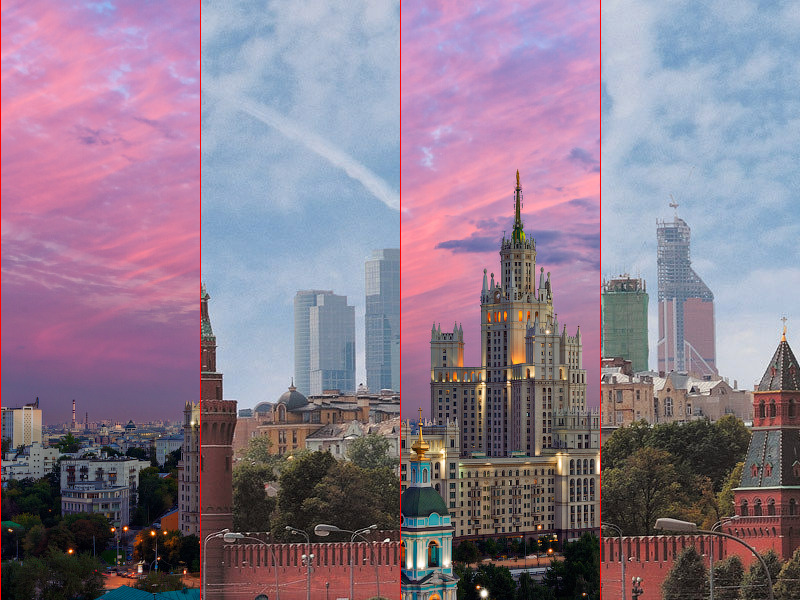

In [25]:
import PIL.Image as Image

# Load the images
image1 = Image.open(r"2.jpg")
image2 = Image.open(r"3.jpg")


# Create a list of images
images = [image1, image2]

# Set the output size
output_size = (800, 600)

# Set the sequence
sequence = "1212"

# Set the number of stripes
num_stripes = 4

# Set the flag to show the grid
show_grid = True

# Set the grid color
grid_color = "red"

# Set the orientation
orientation = "horizontal"

# Call the function
zebra_image = create_zebra_image_with_vertical_splitting(
    images=images,
    output_size=output_size,
    sequence=sequence,
    num_stripes=num_stripes,
    show_grid=show_grid,
    grid_color=grid_color,
    orientation=orientation
)


# Display the zebra image (optional)
display(zebra_image)